In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
import seaborn as sns 
import pandas as pd
from sklearn.model_selection import train_test_split
titanic = sns.load_dataset('titanic')

feature_names = ['pclass', 'female', 'age', 'fare']
titanic['female'] = titanic['sex'].map({'male': 0,'female': 1})
titanic.dropna(subset=feature_names, inplace = True)

X = titanic[feature_names].to_numpy()
y = titanic['survived'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 123)

In [ ]:
print('Tamanho de X_train:', X_train.shape)
print('Tamanho de X_test:', X_test.shape)
print('Tamanho de y_train:', y_train.shape)
print('Tamanho de y_test:', y_test.shape)

Tamanho de X_train: (535, 4)
Tamanho de X_test: (179, 4)
Tamanho de y_train: (535,)
Tamanho de y_test: (179,)


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(4,activation = 'relu', input_shape = X_train[0].shape))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
batch_size = 32
epochs = 100

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(X_test, y_test))

Epoch 1/100
17/17 [==============================] - 1s 13ms/step - loss: 0.7077 - accuracy: 0.5720 - val_loss: 0.6534 - val_accuracy: 0.6201
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6767 - accuracy: 0.5757 - val_loss: 0.6577 - val_accuracy: 0.6257
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6790 - accuracy: 0.5607 - val_loss: 0.6577 - val_accuracy: 0.6201
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6767 - accuracy: 0.5813 - val_loss: 0.6563 - val_accuracy: 0.6201
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6764 - accuracy: 0.5682 - val_loss: 0.6483 - val_accuracy: 0.6201
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6608 - accuracy: 0.5589 - val_loss: 0.6166 - val_accuracy: 0.6257
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6371 - accuracy: 0.5888 - val_loss: 0.5898 - val_accuracy: 0.6257
Epoch 8/100


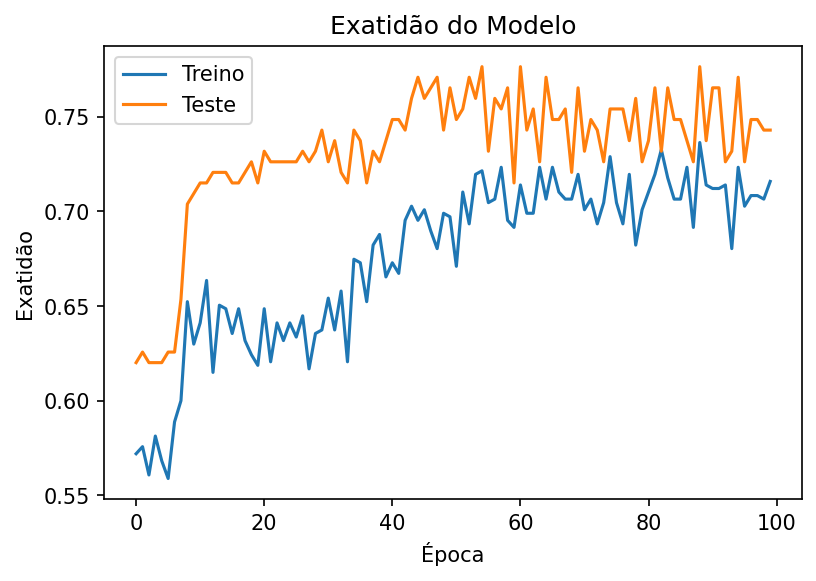

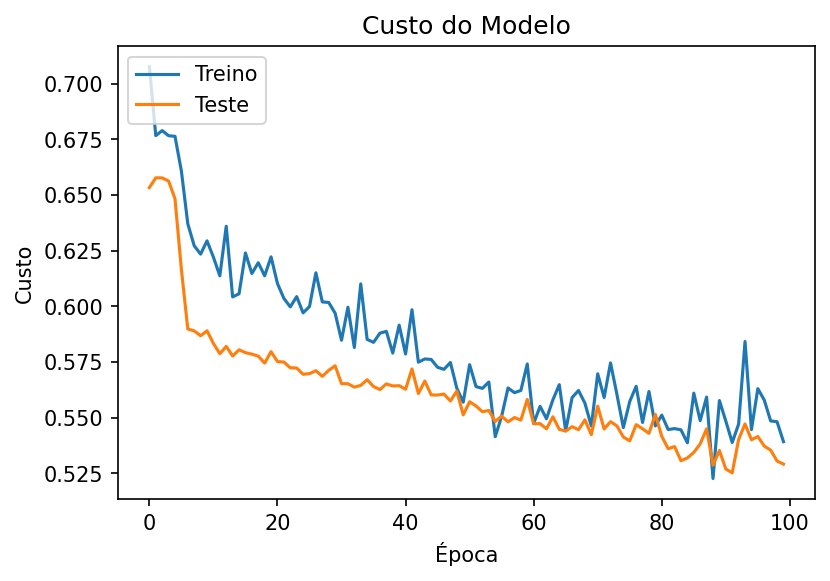

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.dpi'] = 150


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exatidão do Modelo')
plt.ylabel('Exatidão')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Custo do Modelo')
plt.ylabel('Custo')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.5291 - accuracy: 0.7430


[0.5291116237640381, 0.74301677942276]

In [ ]:
(model.predict(X_test) > 0.5).astype('int32')

6/6 [==============================] - 0s 2ms/step


array([[1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
    